In [1]:
%config IPCompleter.greedy=True

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
import os
os.getcwd()
filename = 'mdb_annotations'

In [4]:
#prepare y
annotations = pd.read_csv(filename, sep=' ',header=None)
annotations.columns = ['id', 'tissueType', 'class', 'severity', 'x', 'y', 'radius']
annotations
def is_abnormal(class_value):
    if class_value.find('NORM') >= 0:
       return 0
    return 1
           
annotations['target'] = annotations['class'].apply(is_abnormal)
y = annotations['target']
annotations

,id,tissueType,class,severity,x,y,radius,target
0,mdb001,G,CIRC,B,535,425,197.0,1
1,mdb002,G,CIRC,B,522,280,69.0,1
2,mdb003,D,NORM,NaN,NaN,NaN,NaN,0
3,mdb004,D,NORM,NaN,NaN,NaN,NaN,0
4,mdb005,F,CIRC,B,477,133,30.0,1
5,mdb006,F,NORM,NaN,NaN,NaN,NaN,0
6,mdb007,G,NORM,NaN,NaN,NaN,NaN,0
7,mdb008,G,NORM,NaN,NaN,NaN,NaN,0
8,mdb009,F,NORM,NaN,NaN,NaN,NaN,0
9,mdb010,F,CIRC,B,525,425,33.0,1


In [5]:
y

0      1
1      1
2      0
3      0
4      1
5      0
6      0
7      0
8      0
9      1
10     0
11     1
12     1
13     0
14     1
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     0
24     1
25     0
26     0
27     1
28     0
29     1
      ..
292    0
293    0
294    0
295    0
296    0
297    0
298    0
299    0
300    0
301    0
302    0
303    0
304    0
305    0
306    0
307    0
308    0
309    0
310    0
311    1
312    0
313    1
314    1
315    0
316    0
317    0
318    0
319    0
320    0
321    0
Name: target, Length: 322, dtype: int64

[0 0 0 ... 0 0 0]


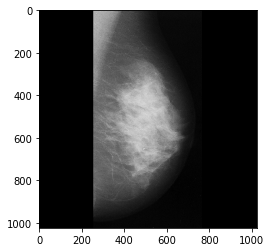

In [6]:
#prepare x
import os
import cv2
import numpy as np
def load_data(img_dir):
    return np.array([cv2.imread(os.path.join(img_dir, img)).flatten() for img in os.listdir(img_dir) if img.endswith(".pgm")])
images = load_data("mdb_dat")
print(images[1])
plt.imshow(images[1].reshape(1024, 1024, 3))

In [7]:
1024 * 1024 * 3

3145728

In [8]:
#import pandas as pd
#from sklearn.model_selection import train_test_split
#imagesframe = pd.DataFrame({"x": images.tolist()})
#imagesframe[0 : 10]
from sklearn.model_selection import train_test_split
X = images
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)

(225, 3145728)


In [9]:
feat_columns = [tf.feature_column.numeric_column('image', shape=(3145728, ))]
classifier = tf.estimator.DNNClassifier(hidden_units=[300, 300], n_classes = 2, feature_columns=feat_columns)
                                                 
import numpy as np

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpjgcpz0rr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f9f2d6f4ef0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [10]:
input_fn=tf.estimator.inputs.numpy_input_fn(dict({'image':X_train}),np.array(y_train,np.int32), batch_size=5, num_epochs=35,  shuffle=True)

In [11]:
classifier.train(input_fn = input_fn, steps=20)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpjgcpz0rr/model.ckpt.


ResourceExhaustedError: OOM when allocating tensor with shape[3145728,300] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node dnn/head/gradients/dnn/hiddenlayer_0/MatMul_grad/MatMul_1 (defined at <ipython-input-11-d3167c5b7ac5>:1)  = MatMul[T=DT_FLOAT, transpose_a=true, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dnn/input_from_feature_columns/input_layer/image/ToFloat, dnn/head/gradients/dnn/hiddenlayer_0/Relu_grad/ReluGrad, ^dnn/head/gradients/dnn/hiddenlayer_0/BiasAdd_grad/BiasAddGrad)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


Caused by op 'dnn/head/gradients/dnn/hiddenlayer_0/MatMul_grad/MatMul_1', defined at:
  File "/home/sandeep/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/sandeep/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 505, in start
    self.io_loop.start()
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 132, in start
    self.asyncio_loop.run_forever()
  File "/home/sandeep/anaconda3/lib/python3.6/asyncio/base_events.py", line 422, in run_forever
    self._run_once()
  File "/home/sandeep/anaconda3/lib/python3.6/asyncio/base_events.py", line 1434, in _run_once
    handle._run()
  File "/home/sandeep/anaconda3/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 758, in _run_callback
    ret = callback()
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1233, in inner
    self.run()
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 1147, in run
    yielded = self.gen.send(value)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tornado/gen.py", line 326, in wrapper
    yielded = next(result)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2819, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2845, in _run_cell
    return runner(coro)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/IPython/core/async_helpers.py", line 67, in _pseudo_sync_runner
    coro.send(None)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3020, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3191, in run_ast_nodes
    if (yield from self.run_code(code, result)):
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-11-d3167c5b7ac5>", line 1, in <module>
    classifier.train(input_fn = input_fn, steps=20)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/estimator.py", line 354, in train
    loss = self._train_model(input_fn, hooks, saving_listeners)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/estimator.py", line 1207, in _train_model
    return self._train_model_default(input_fn, hooks, saving_listeners)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/estimator.py", line 1237, in _train_model_default
    features, labels, model_fn_lib.ModeKeys.TRAIN, self.config)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/estimator.py", line 1195, in _call_model_fn
    model_fn_results = self._model_fn(features=features, **kwargs)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/canned/dnn.py", line 486, in _model_fn
    shared_state_manager=shared_state_manager)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/canned/dnn.py", line 315, in _dnn_model_fn
    logits=logits)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/canned/head.py", line 239, in create_estimator_spec
    regularization_losses))
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/canned/head.py", line 1243, in _create_tpu_estimator_spec
    global_step=training_util.get_global_step())
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 400, in minimize
    grad_loss=grad_loss)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 519, in compute_gradients
    colocate_gradients_with_ops=colocate_gradients_with_ops)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 630, in gradients
    gate_gradients, aggregation_method, stop_gradients)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 814, in _GradientsHelper
    lambda: grad_fn(op, *out_grads))
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 408, in _MaybeCompile
    return grad_fn()  # Exit early
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py", line 814, in <lambda>
    lambda: grad_fn(op, *out_grads))
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py", line 1131, in _MatMulGrad
    grad_b = gen_math_ops.mat_mul(a, grad, transpose_a=True)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4560, in mat_mul
    name=name)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

...which was originally created as op 'dnn/hiddenlayer_0/MatMul', defined at:
  File "/home/sandeep/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
[elided 31 identical lines from previous traceback]
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/canned/dnn.py", line 486, in _model_fn
    shared_state_manager=shared_state_manager)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/canned/dnn.py", line 300, in _dnn_model_fn
    logits = logit_fn(features=features, mode=mode)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/canned/dnn.py", line 109, in dnn_logit_fn
    return dnn_model(features, mode)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 757, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/estimator/canned/dnn.py", line 206, in call
    net = self._hidden_layers[i](net)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/layers/base.py", line 374, in __call__
    outputs = super(Layer, self).__call__(inputs, *args, **kwargs)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/engine/base_layer.py", line 757, in __call__
    outputs = self.call(inputs, *args, **kwargs)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/keras/layers/core.py", line 970, in call
    outputs = gen_math_ops.mat_mul(inputs, self.kernel)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_math_ops.py", line 4560, in mat_mul
    name=name)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
    return func(*args, **kwargs)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
    op_def=op_def)
  File "/home/sandeep/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__
    self._traceback = tf_stack.extract_stack()

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[3145728,300] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[node dnn/head/gradients/dnn/hiddenlayer_0/MatMul_grad/MatMul_1 (defined at <ipython-input-11-d3167c5b7ac5>:1)  = MatMul[T=DT_FLOAT, transpose_a=true, transpose_b=false, _device="/job:localhost/replica:0/task:0/device:CPU:0"](dnn/input_from_feature_columns/input_layer/image/ToFloat, dnn/head/gradients/dnn/hiddenlayer_0/Relu_grad/ReluGrad, ^dnn/head/gradients/dnn/hiddenlayer_0/BiasAdd_grad/BiasAddGrad)]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.



In [13]:
pred_func = tf.estimator.inputs.numpy_input_fn(dict({'image':X_test}),batch_size=len(X_test), shuffle=False)

In [14]:
predictions = list(classifier.predict(input_fn=pred_func))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpjgcpz0rr/model.ckpt-0
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [15]:
predictions


[{'logits': array([35.18655], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([5.232093e-16, 1.000000e+00], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-198.18521], dtype=float32),
  'logistic': array([0.], dtype=float32),
  'probabilities': array([1., 0.], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([57.08047], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([1.6228052e-25, 1.0000000e+00], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([85.06169], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabilities': array([1.1433439e-37, 1.0000000e+00], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([62.7351], dtype=float32),
  'logistic': array([1.], dtype=float32),
  'probabil

In [16]:
final_preds = []
for pred in predictions:
    final_preds.append(pred['class_ids'][0])

In [17]:
final_preds

[1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0]

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(confusion_matrix(y_test, final_preds))

[[29 31]
 [15 22]]


In [20]:
print(classification_report(y_test, final_preds))

              precision    recall  f1-score   support

           0       0.66      0.48      0.56        60
           1       0.42      0.59      0.49        37

   micro avg       0.53      0.53      0.53        97
   macro avg       0.54      0.54      0.52        97
weighted avg       0.57      0.53      0.53        97

